<a href="https://colab.research.google.com/github/Jacin21/Fraud_Transaction/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Loading the dataset

In [ ]:
data=pd.read_csv('Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Visualization

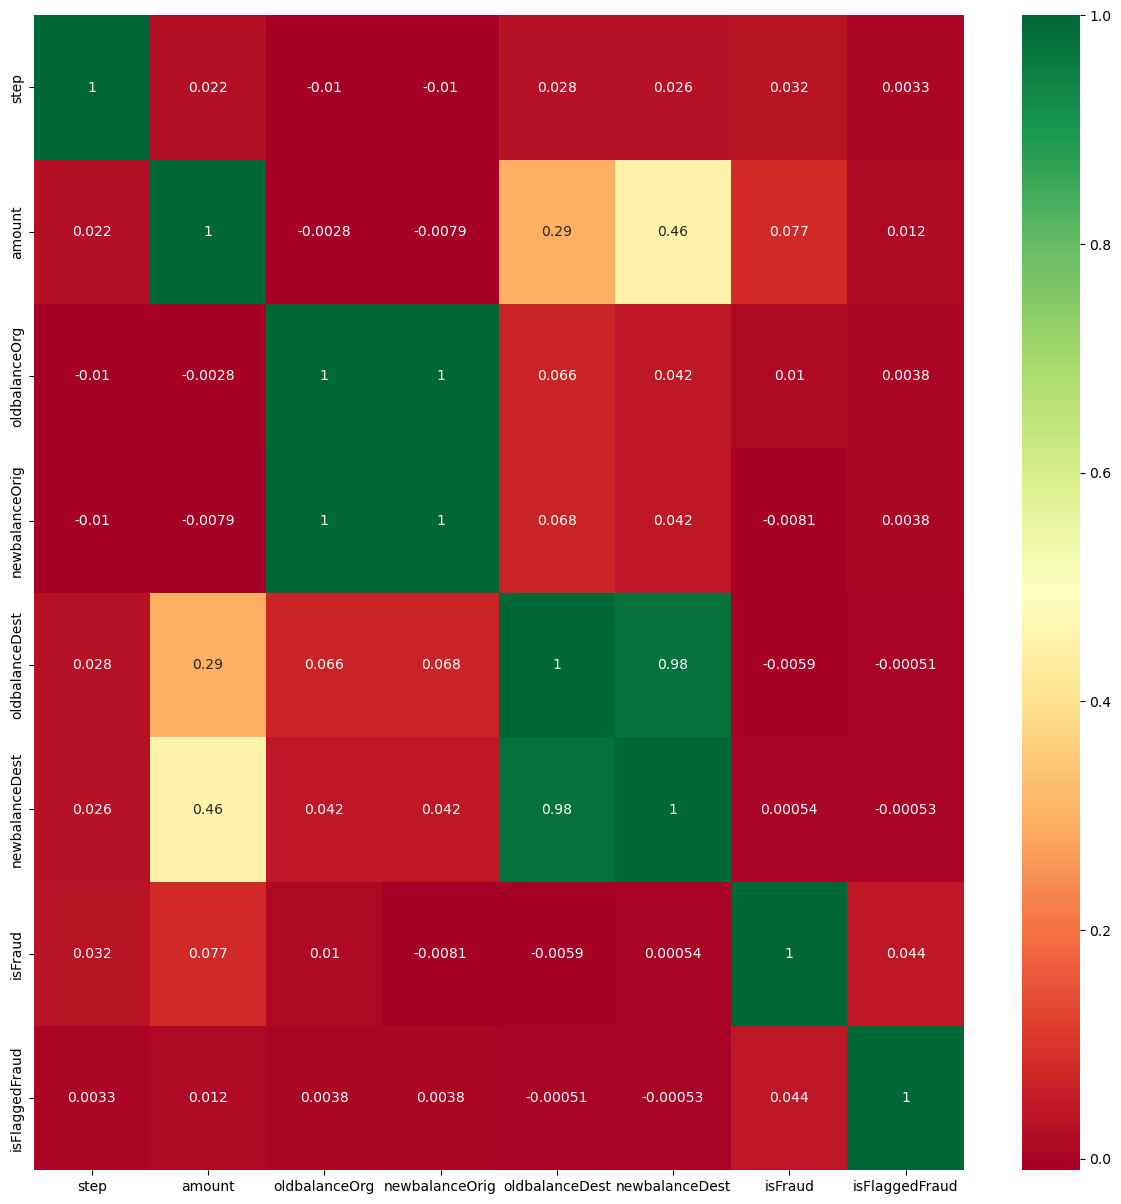

In [ ]:
corrmat = data.corr()
corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
heat_map=sns.heatmap(data[corr_features].corr(),annot=True,cmap="RdYlGn")

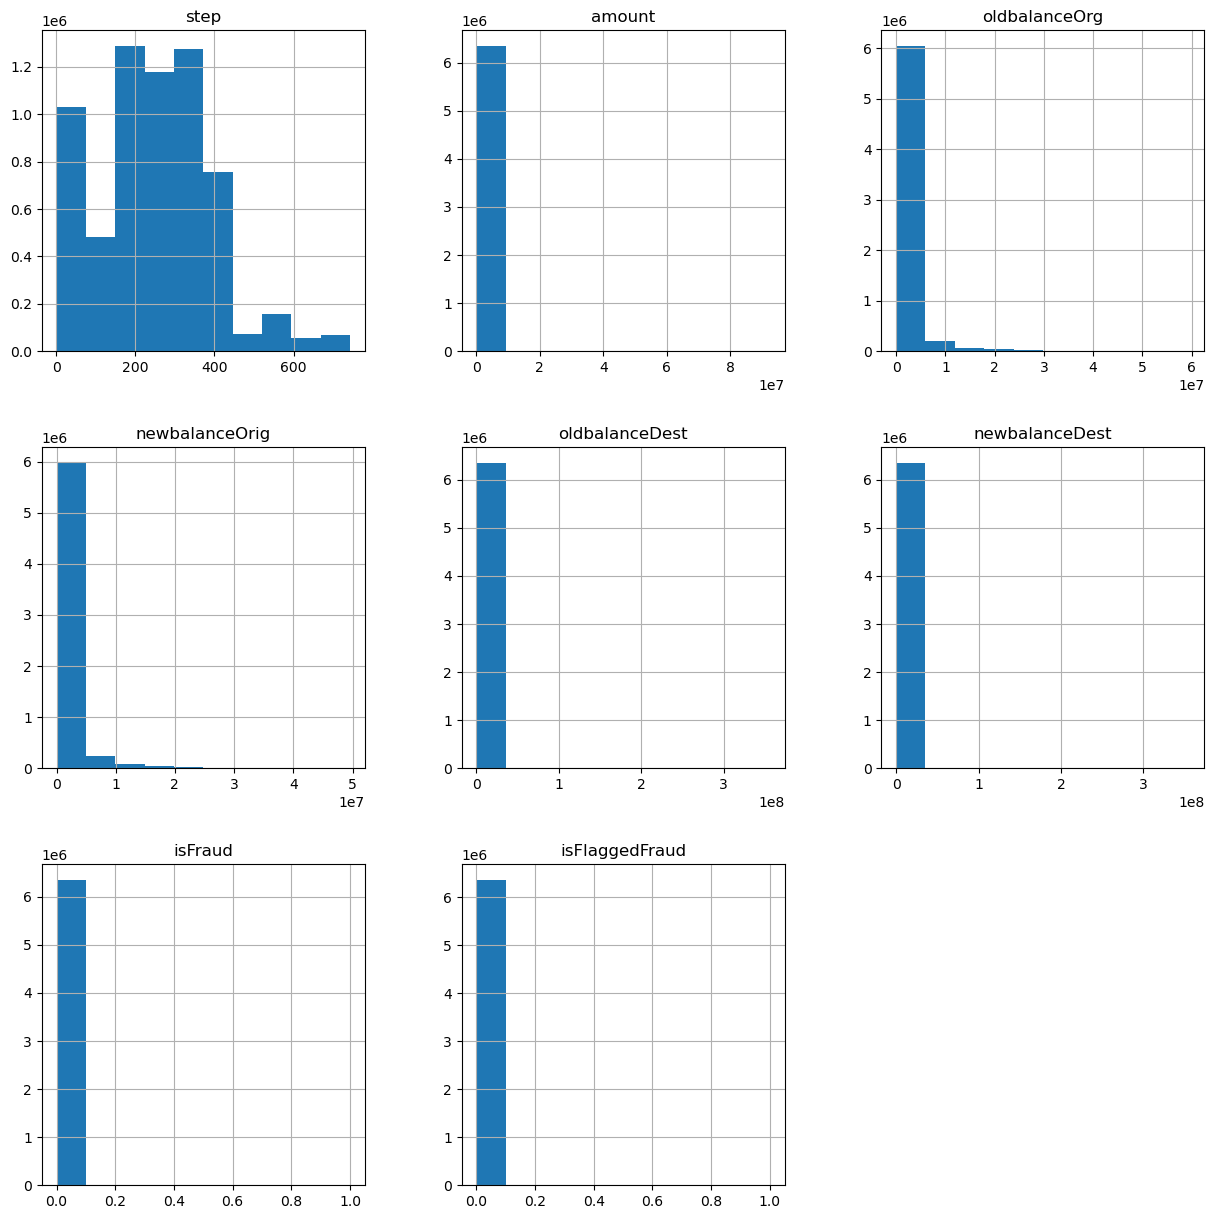

In [ ]:
data.hist(figsize = (15, 15))
plt.show()

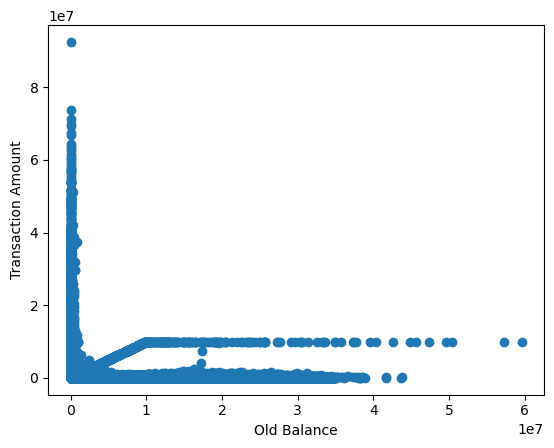

In [ ]:
plt.scatter(data['oldbalanceOrg'], data['amount'])
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')
plt.show()

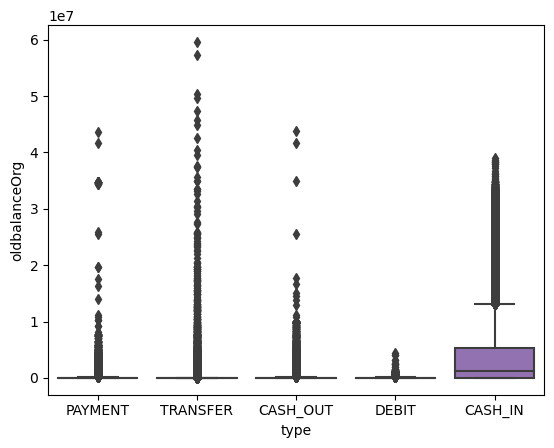

In [ ]:
sns.boxplot(x='type', y='oldbalanceOrg', data=data)
plt.show()

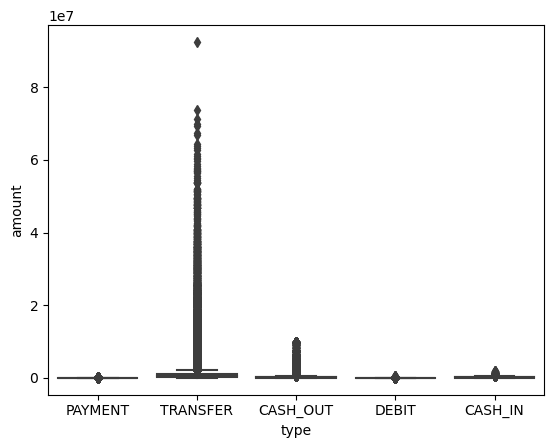

In [ ]:
sns.boxplot(x='type', y='amount', data=data)
plt.show()

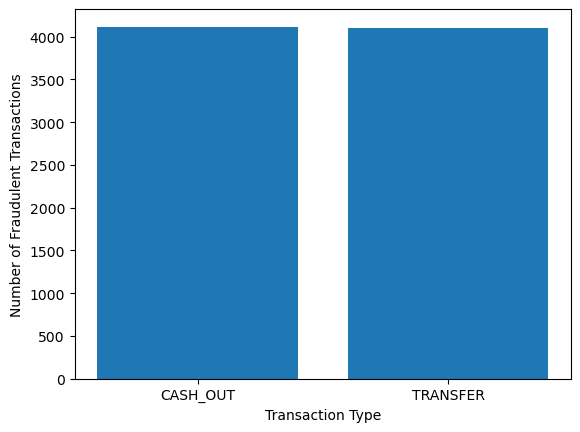

In [ ]:
fraud_counts = data[data['isFraud'] == 1].groupby('type').size()

plt.bar(fraud_counts.index, fraud_counts.values)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

Both transfer and cashout contribute almost equally towards fraud.

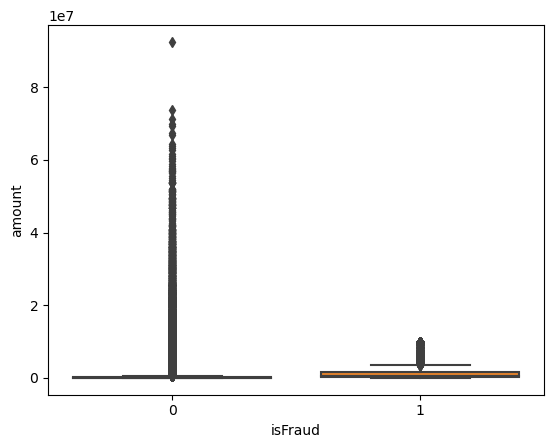

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=data)
plt.show()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encode the 'type' column using LabelEncoder
le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

In [ ]:
# encode the 'type' column using LabelEncoder
le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

# move 'type_encoded' column to the position where 'type' column is
type_pos = data.columns.get_loc('type')
data.insert(type_pos, 'type_encoded', data.pop('type_encoded'))

# remove the 'type' column
data.drop('type', axis=1, inplace=True)


In [ ]:
le = LabelEncoder()
data['nameOrig_encoded'] = le.fit_transform(data['nameOrig'])

type_pos = data.columns.get_loc('nameOrig')
data.insert(type_pos, 'nameOrig_encoded', data.pop('nameOrig_encoded'))

data.drop('nameOrig', axis=1, inplace=True)


In [ ]:
le = LabelEncoder()
data['nameDest_encoded'] = le.fit_transform(data['nameDest'])

type_pos = data.columns.get_loc('nameDest')
data.insert(type_pos, 'nameDest_encoded', data.pop('nameDest_encoded'))

data.drop('nameDest', axis=1, inplace=True)


In [ ]:
data

,step,type_encoded,amount,nameOrig_encoded,oldbalanceOrg,newbalanceOrig,nameDest_encoded,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


## Analysing

In [ ]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
fraud_type = data[data['isFraud']==1].groupby('type_encoded')['isFraud'].count()
flaggedFraud_type = data[data['isFlaggedFraud']==1].groupby('type_encoded')['isFlaggedFraud'].count()

In [ ]:
print(f'Fraud per transaction type: \n{fraud_type}\n \nFlagged fraud per transaction type: \n{flaggedFraud_type}')

Fraud per transaction type: 
type_encoded
1    4116
4    4097
Name: isFraud, dtype: int64
 
Flagged fraud per transaction type: 
type_encoded
4    16
Name: isFlaggedFraud, dtype: int64


## Test and Train

In [ ]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = clf.predict(X_val)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[1270888      16]
 [    360    1260]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.78      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



From the classification report, we can see that the model is performing well in predicting non-fraudulent transactions (class 0) with a precision and recall of 1.00. However, the model is less accurate in predicting fraudulent transactions (class 1) with a recall of 0.78. This means that the model is correctly identifying only 78% of fraudulent transactions.

To improve fraud prevention, we can take the following steps:

1.Increase the sample size of fraudulent transactions in the dataset: 
    Since the number of fraudulent transactions is much smaller than the number of non-fraudulent transactions, we can consider collecting more data on fraudulent 
    transactions to improve the model's ability to predict them.

2.Feature engineering: 
    We can also consider creating new features from the existing data, which can help the model better distinguish between fraudulent and non-fraudulent transactions.

3.Regularly update the model: 
    Fraudulent activities can change over time, so it's essential to regularly update the model with new data to ensure it is still accurately identifying fraudulent transactions.

4.Monitor the transactions: 
    Even with a good model, it's still essential to keep an eye on the transactions for any suspicious activities. 
    Automated monitoring systems can flag transactions that the model may have missed.